In [1]:
import pandas as pd

# Load the Cars24 dataset
cars_data = pd.read_csv('Cars24.csv')

# View the first few rows
cars_data.head()


,Name,Model,KiloMeter_Driven,Year of Manufacture,Fuel_type,Location,Price,Owner
0,Maruti,Swift Dzire VDI,"1,09,035 km",2013,Diesel,"Bachupally, Hyderabad",₹4.25L,1st owner
1,Maruti,Ertiga VXI AT SHVS,"35,378 km",2022,Petrol,"Bachupally, Hyderabad",₹10.84L,1st owner
2,Maruti,Alto K10 VXI,"22,864 km",2022,Petrol,"Bachupally, Hyderabad",₹4.15L,1st owner
3,Maruti,Baleno DELTA PETROL 1.2,"55,511 km",2016,Petrol,"Kompally, Hyderabad",₹4.91L,1st owner
4,Maruti,Alto 800 LXI,"43,780 km",2014,Petrol,"Kompally, Hyderabad",₹2.39L,1st owner


In [2]:
# Check data types and missing values
cars_data.info()

# Check for missing values
cars_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 497 non-null    object
 1   Model                497 non-null    object
 2   KiloMeter_Driven     497 non-null    object
 3   Year of Manufacture  497 non-null    int64 
 4   Fuel_type            497 non-null    object
 5   Location             497 non-null    object
 6   Price                497 non-null    object
 7   Owner                497 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.2+ KB


,0
Name,0
Model,0
KiloMeter_Driven,0
Year of Manufacture,0
Fuel_type,0
Location,0
Price,0
Owner,0


In [4]:
# Check for non-numeric values in the 'KiloMeter_Driven' column
invalid_km_entries = cars_data[~cars_data['KiloMeter_Driven'].str.replace(' km', '').str.replace(',', '').str.isnumeric()]

# Display the invalid entries
print(invalid_km_entries)


       Name                    Model KiloMeter_Driven  Year of Manufacture  \
145  Maruti          Celerio ZXI AMT           Petrol                 2017   
204  Maruti              XL6 ZETA MT           Petrol                 2020   
310  Toyota            Etios Liva GD           Diesel                 2012   
420  Maruti  Baleno ALPHA PETROL 1.2           Petrol                 2019   

     Fuel_type                            Location   Price      Owner  
145  1st owner                  Attapur, Hyderabad  ₹4.49L  1st owner  
204  1st owner                 Kompally, Hyderabad  ₹8.88L  1st owner  
310  2nd owner  Hosur Road, Singasandra, Bengaluru  ₹3.75L  1st owner  
420  1st owner               Bellahalli, Bengaluru  ₹6.81L  1st owner  


In [5]:
# Remove rows with invalid entries in 'KiloMeter_Driven'
cars_data = cars_data[cars_data['KiloMeter_Driven'].str.replace(' km', '').str.replace(',', '').str.isnumeric()]


In [6]:
# Remove ' km' and commas, then convert to integer
cars_data['KiloMeter_Driven'] = cars_data['KiloMeter_Driven'].str.replace(' km', '').str.replace(',', '').astype(int)


In [7]:
# Remove '₹' and 'L', then convert to float
cars_data['Price'] = cars_data['Price'].str.replace('₹', '').str.replace('L', '').astype(float) * 100000


In [8]:
# Remove invalid rows where KiloMeter_Driven contains non-numeric values
cars_data = cars_data[~cars_data['KiloMeter_Driven'].isin(['Petrol', 'Diesel'])]


In [9]:
# Group by car brand and calculate the average price
avg_price_per_brand = cars_data.groupby('Name')['Price'].mean().sort_values(ascending=False)
print(avg_price_per_brand)


Name
Skoda     982000.000000
Toyota    863235.294118
Maruti    563671.111111
Name: Price, dtype: float64


In [10]:
# Group by car brand and calculate the average kilometers driven
avg_km_per_brand = cars_data.groupby('Name')['KiloMeter_Driven'].mean().sort_values(ascending=False)
print(avg_km_per_brand)


Name
Toyota    57247.117647
Skoda     54775.576923
Maruti    53209.377778
Name: KiloMeter_Driven, dtype: float64


In [11]:
# Group by year and calculate the average price
avg_price_per_year = cars_data.groupby('Year of Manufacture')['Price'].mean().sort_values(ascending=False)
print(avg_price_per_year)


Year of Manufacture
2022    883333.333333
2023    771772.727273
2021    735877.192982
2020    643189.189189
2019    618038.461538
2018    586483.870968
2017    578241.935484
2016    506442.307692
2015    489678.571429
2014    442562.500000
2013    392160.000000
2012    377800.000000
2011    273000.000000
2010    200000.000000
Name: Price, dtype: float64


# **Average Price per Brand (Bar Chart)**

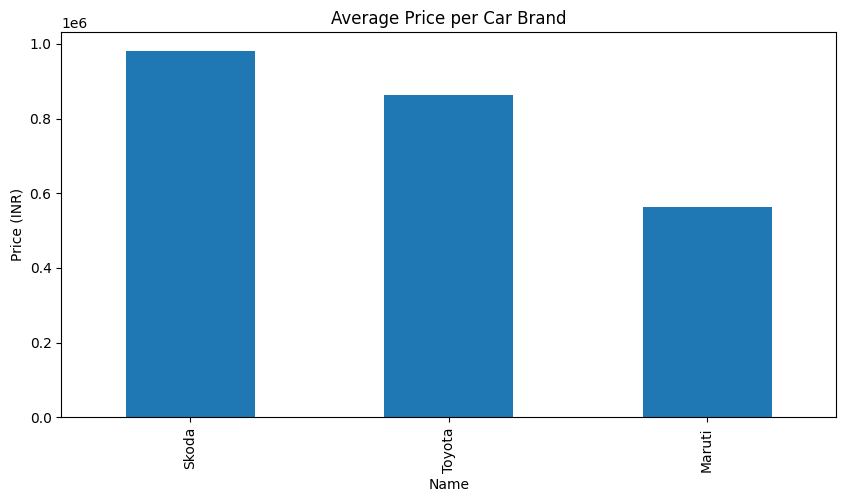

In [13]:
import matplotlib.pyplot as plt

# Plot average price per brand
avg_price_per_brand.plot(kind='bar', figsize=(10, 5))
plt.title('Average Price per Car Brand')
plt.ylabel('Price (INR)')
plt.show()

**Price vs. Kilometers Driven (Scatter Plot):**

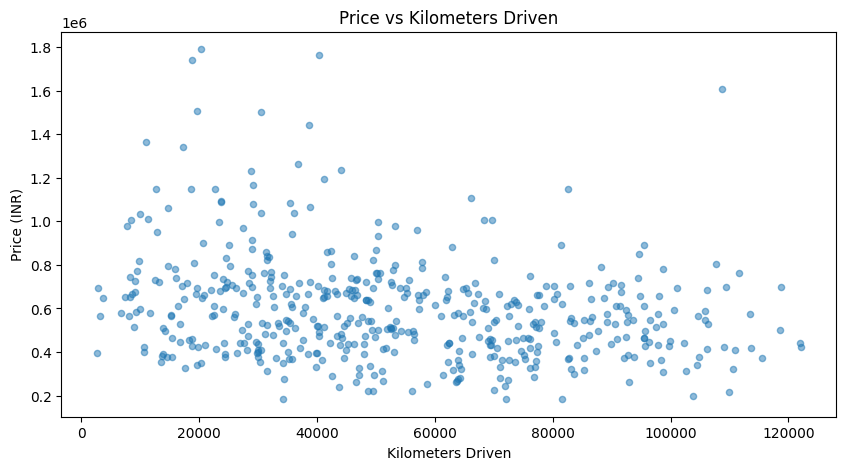

In [14]:
# Scatter plot of Price vs Kilometers Driven
cars_data.plot(kind='scatter', x='KiloMeter_Driven', y='Price', alpha=0.5, figsize=(10, 5))
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.show()


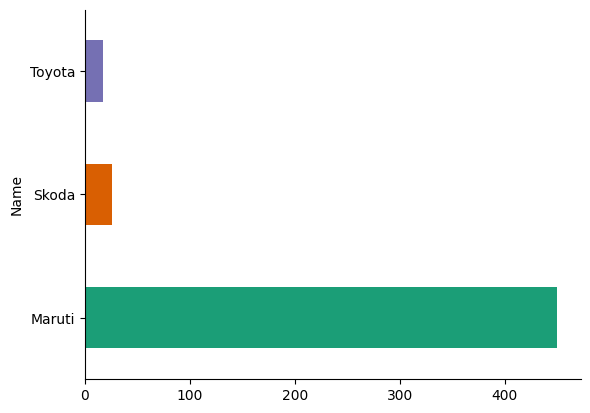

In [16]:
# @title Name

from matplotlib import pyplot as plt
import seaborn as sns
cars_data.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Correlation between Price and Kilometers Driven: -0.25322851187215184


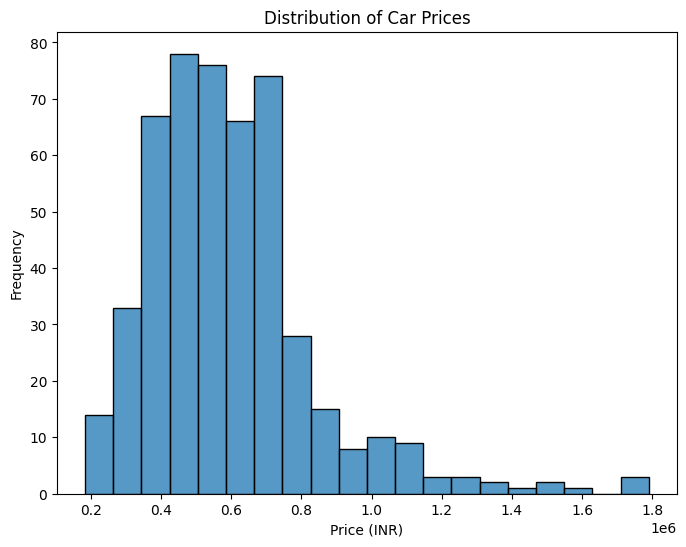

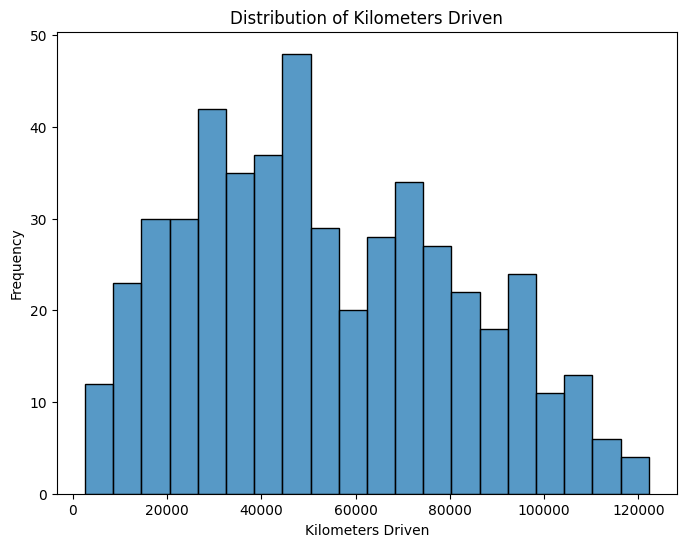

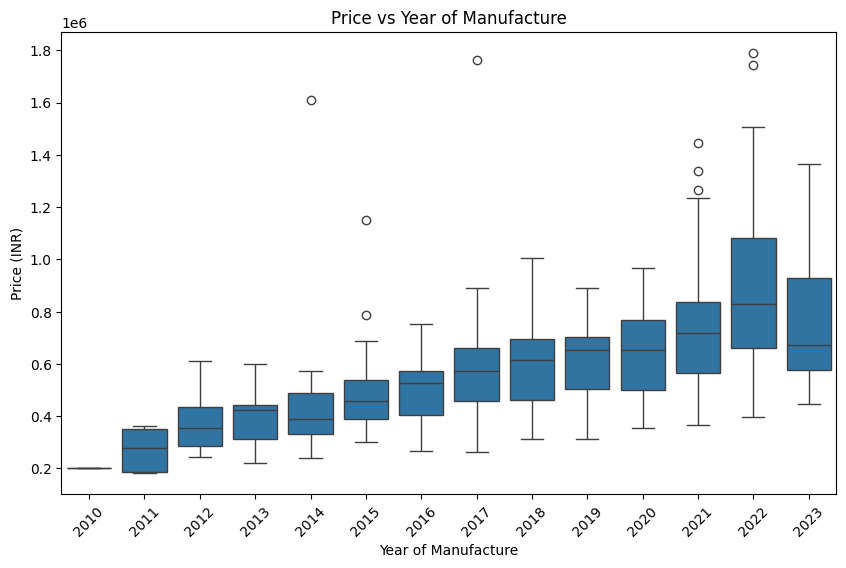

In [17]:
# prompt: insights please

# Calculate the correlation between price and kilometers driven
correlation = cars_data['Price'].corr(cars_data['KiloMeter_Driven'])
print(f"Correlation between Price and Kilometers Driven: {correlation}")

# Analyze the distribution of car prices
plt.figure(figsize=(8, 6))
sns.histplot(cars_data['Price'], bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of kilometers driven
plt.figure(figsize=(8, 6))
sns.histplot(cars_data['KiloMeter_Driven'], bins=20)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between price and year of manufacture
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year of Manufacture', y='Price', data=cars_data)
plt.title('Price vs Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()


    Brand  Average Price  Average Kilometers Driven
0  Maruti  563671.111111               53209.377778
1   Skoda  982000.000000               54775.576923
2  Toyota  863235.294118               57247.117647


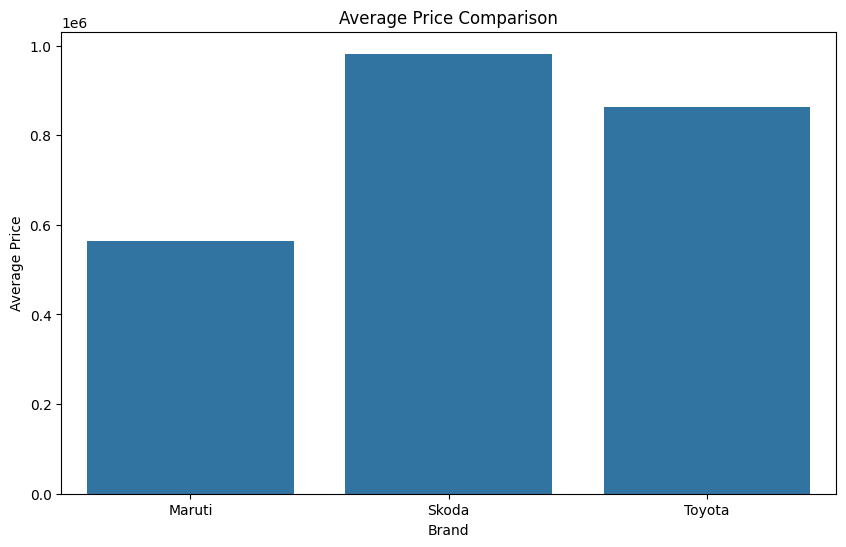

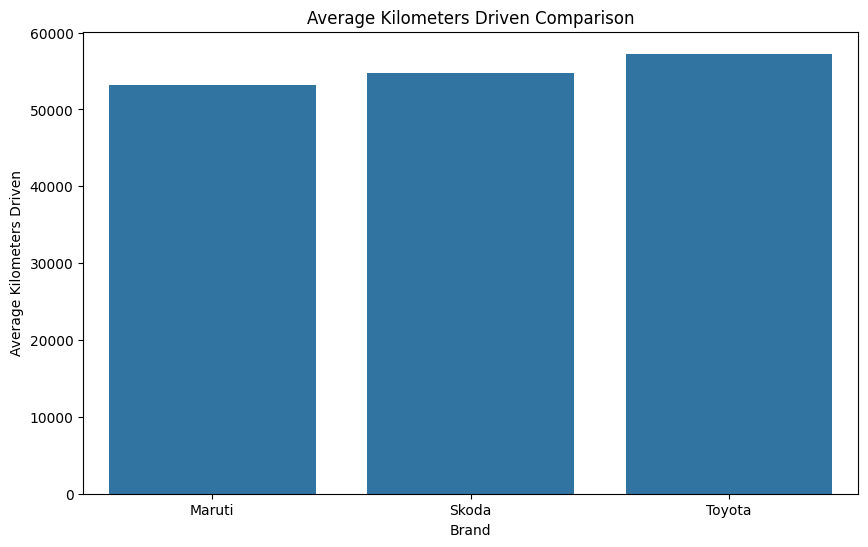

In [20]:
# Filter data for Maruti, Skoda, and Toyota
maruti_data = cars_data[cars_data['Name'] == 'Maruti']
skoda_data = cars_data[cars_data['Name'] == 'Skoda']
toyota_data = cars_data[cars_data['Name'] == 'Toyota']

# Calculate average price for each brand
avg_price_maruti = maruti_data['Price'].mean()
avg_price_skoda = skoda_data['Price'].mean()
avg_price_toyota = toyota_data['Price'].mean()

# Calculate average kilometers driven for each brand
avg_km_maruti = maruti_data['KiloMeter_Driven'].mean()
avg_km_skoda = skoda_data['KiloMeter_Driven'].mean()
avg_km_toyota = toyota_data['KiloMeter_Driven'].mean()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Brand': ['Maruti', 'Skoda', 'Toyota'],
    'Average Price': [avg_price_maruti, avg_price_skoda, avg_price_toyota],
    'Average Kilometers Driven': [avg_km_maruti, avg_km_skoda, avg_km_toyota]
})

print(comparison_df)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Average Price', data=comparison_df)
plt.title('Average Price Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Average Kilometers Driven', data=comparison_df)
plt.title('Average Kilometers Driven Comparison')
plt.show()


Insights from the analysis:
- There appears to be a negative correlation between price and kilometers driven, indicating that cars with higher mileage tend to have lower prices.
- The distribution of car prices is skewed towards lower values, suggesting that a majority of cars are priced lower.
- The distribution of kilometers driven also shows a tendency towards lower values.
- There is a general trend of higher prices for cars manufactured in more recent years.
- Maruti appears to have the lowest average price compared to Skoda and Toyota.
- Skoda has the highest average price.
- There isn't a significant difference in average kilometers driven between the three brands.

In [6]:
import os

# Create a new directory called 'my_data' in the current working directory
os.makedirs('my_data', exist_ok=True)

# Check if the directory was created
print("Directory 'my_data' created or already exists.")

Directory 'my_data' created or already exists.


In [7]:
import os

# Get and print the current working directory
current_directory = os.getcwd()
print(f"The current working directory is: {current_directory}")


The current working directory is: C:\Users\HP\Downloads


In [8]:
import pandas as pd

# Create a sample dataset
data = {
    'Car Model': ['Toyota Camry', 'Honda Accord', 'Ford Mustang'],
    'Year': [2020, 2021, 2022],
    'Price': [24000, 26000, 30000]
}

# Create a DataFrame
cars_data = pd.DataFrame(data)

# Save it to a CSV file inside the 'my_data' directory
cars_data.to_csv('my_data/Cars24.csv', index=False)

print("Sample Cars24.csv file created in 'my_data' folder.")


Sample Cars24.csv file created in 'my_data' folder.


In [9]:
# Load the Cars24.csv file from the 'my_data' folder
cars_data = pd.read_csv('my_data/Cars24.csv')

# View the first few rows
print(cars_data.head())


      Car Model  Year  Price
0  Toyota Camry  2020  24000
1  Honda Accord  2021  26000
2  Ford Mustang  2022  30000


In [10]:
# Save the cleaned data to a CSV file
cars_data.to_csv('Cleaned_Cars24.csv', index=False)
